In [3]:
# Descargamos los datos de Ecobici para el 2019 desde
# https://data.buenosaires.gob.ar/dataset/bicicletas-publicas/archivo/97819ab4-412c-492d-bca1-6106f3a60bf7

In [4]:
import pandas as pd

In [5]:
#leemos los datos
dt = pd.read_csv('../data/recorridos-realizados-2019.csv')
dt.head()

/home/pipe/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (0,4,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id_usuario,fecha_origen_recorrido,duracion_recorrido,nombre_estacion_origen,id_estacion_origen,nombre_estacion_destino,id_estacion_destino,genero_usuario,edad_usuario,fecha_destino_recorrido
0,115783_0,2019-01-01 00:01:16,0 days 00:07:02.000000000,Estados Unidos,168_0,9 de Julio,112_0,FEMENINO,36.0,2019-01-01 00:08:18
1,345364_0,2019-01-01 00:04:32,0 days 00:05:33.000000000,Colegio Nacional Buenos Aires,47_0,Colegio Nacional Buenos Aires,47_0,MASCULINO,40.0,2019-01-01 00:10:05
2,570578_0,2019-01-01 00:09:15,0 days 00:19:45.000000000,Pueyrredón,144_0,Ecoparque,44_0,FEMENINO,41.0,2019-01-01 00:29:00
3,588687_0,2019-01-01 00:09:28,0 days 00:19:34.000000000,Pueyrredón,144_0,Ecoparque,44_0,MASCULINO,43.0,2019-01-01 00:29:02
4,127201_0,2019-01-01 00:11:17,0 days 00:21:32.000000000,Legislatura,16_0,EEUU y Boedo,199_0,MASCULINO,33.0,2019-01-01 00:32:49


In [6]:
#convertimos en tipo fecha la columna del tiempo de origen
dt['FECHA'] = pd.to_datetime(dt.fecha_origen_recorrido,format = '%Y-%m-%d %H:%M:%S')

In [7]:
dt.FECHA.describe()

count                 2850451
unique                2394773
top       2019-07-17 13:47:51
freq                       16
first     2019-01-01 00:01:16
last      2019-07-31 23:59:56
Name: FECHA, dtype: object

Podemos observar que el plazo de tiempo observado en el data set comprende los dias que van desde el 1 de enero de 2019 al 31 de julio de 2019.

In [12]:
#obtenemos una tabla de cantidad de recorridos por usuario
rec_por_usuario = dt.reindex(columns=['id_usuario','duracion_recorrido'])\
                    .groupby('id_usuario').count()
rec_por_usuario.columns = ['n_viajes']

rec_por_usuario.describe()

,n_viajes
count,325495.000000
mean,8.756835
std,14.828292
min,0.000000
25%,1.000000
50%,4.000000
75%,9.000000
max,645.000000


In [13]:
rec_por_usuario.mean()

n_viajes    8.756835
dtype: float64

In [14]:
rec_por_usuario.median()

n_viajes    4.0
dtype: float64

Observamos que la cantidad de recorridos por usuario promedio para estos 7 meses es de 8.75 viajes por usuario y una mediana de 4 viajes por usuario.

In [16]:
#podemos observar al usuario que mas recorridos realizo
rec_por_usuario.sort_values('n_viajes',ascending=False).head()

,n_viajes
id_usuario,
13700,645
18663,557
18296,549
12434,405
62316,383


El usuario que mas viajes realizo es el identificado con el ID 13700 que realizo 645 viajes en 7 meses

In [23]:
#observamos datos AGRUPADOS POR ESTACION
rec_por_estacion = dt.reindex(columns=['nombre_estacion_destino','duracion_recorrido'])\
                    .groupby('nombre_estacion_destino').count()
rec_por_estacion.columns = ['n_viajes']

rec_por_estacion = rec_por_estacion.sort_values(by='n_viajes',ascending=False)

rec_por_estacion = rec_por_estacion.reset_index()
rec_por_estacion.head()

,nombre_estacion_destino,n_viajes
0,147 - Constitución,40926
1,009 - Parque Las Heras,34207
2,014 - Pacifico,32532
3,069 - Ecuador,30292
4,008 - Congreso,28367


La estacion mas utilizada del sistema Ecobici para este plazo de tiempo fue Constitución.

In [25]:
#Realizamos un analisis por genero
#llenamos los missing con NO INFORMADO
dt.genero_usuario = dt.genero_usuario.fillna('NO INFORMADO')
dt.genero_usuario.value_counts() / len(dt) * 100

NO INFORMADO    92.840712
MASCULINO        5.255449
FEMENINO         1.903839
Name: genero_usuario, dtype: float64

Se observa que la mayoria de los usuarios no informa su genero. Solo un 5.2 % es masculino y 1.9 % femenino

In [90]:
import matplotlib.pyplot as plt
%matplotlib inline

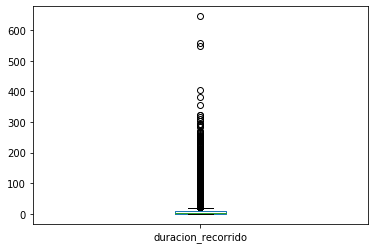

In [94]:
rec_por_usuario.plot(kind='box')

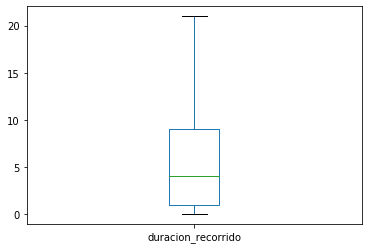

In [95]:
rec_por_usuario.plot(kind='box',showfliers=False)

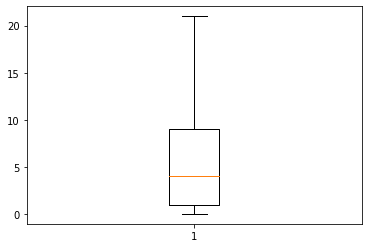

In [106]:
plt.boxplot(rec_por_usuario.values,showfliers=False)
print()